In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [11]:
from keras import backend as K
print(K.backend())

tensorflow


In [3]:
# Create the model
inputs = keras.Input(shape=(784,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [4]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [6]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [7]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2874 - accuracy: 0.9172 - val_loss: 0.1539 - val_accuracy: 0.9557
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1227 - accuracy: 0.9641 - val_loss: 0.1150 - val_accuracy: 0.9663
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0821 - accuracy: 0.9761 - val_loss: 0.0950 - val_accuracy: 0.9697
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0940 - val_accuracy: 0.9702
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0444 - accuracy: 0.9874 - val_loss: 0.0845 - val_accuracy: 0.9745
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0801 - val_accuracy: 0.9763
Epoch 

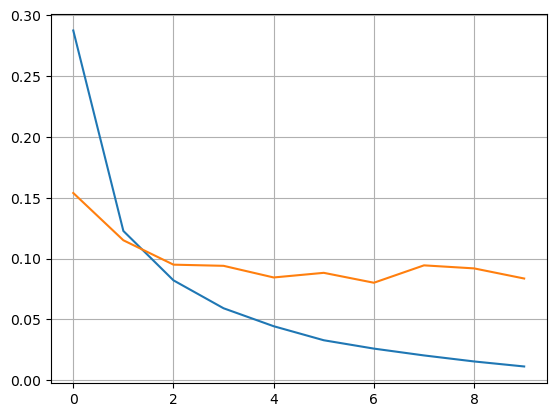

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [9]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.0722 - accuracy: 0.9798 - 399ms/epoch - 1ms/step
Test loss: 0.07220342755317688
Test accuracy: 0.9797999858856201


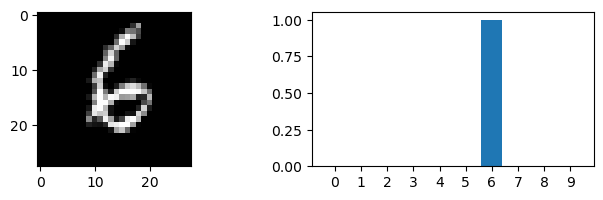

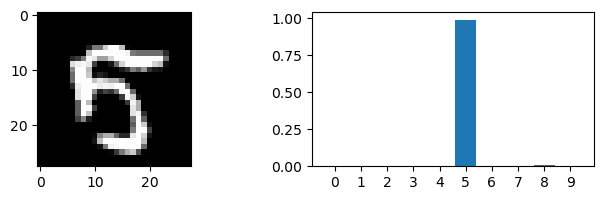

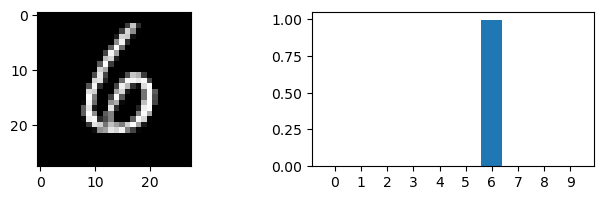

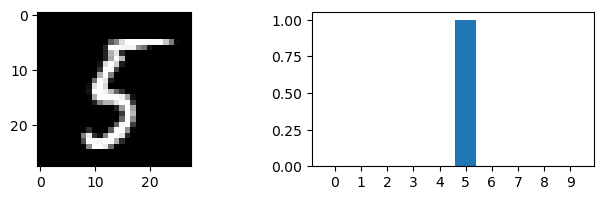

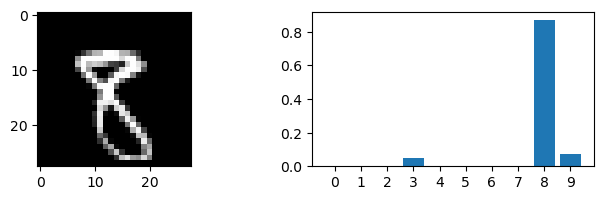

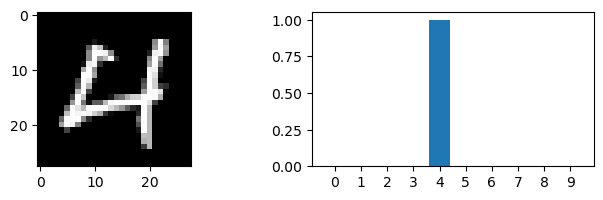

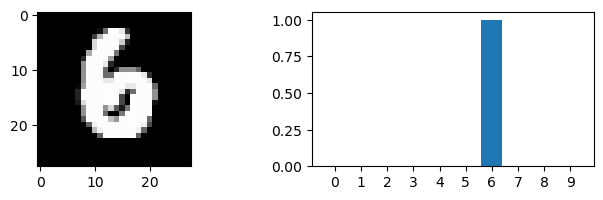

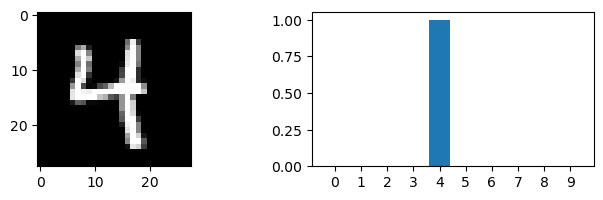

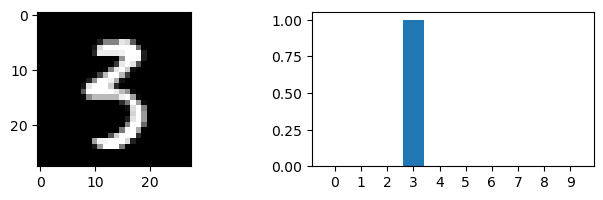

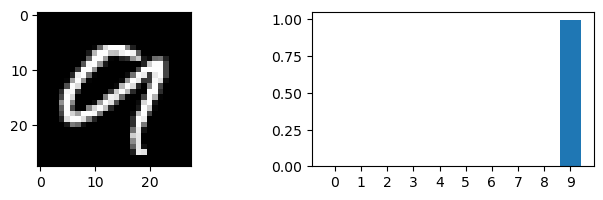

In [10]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))